# Homework Assignment 1

Course: “Performance of Networked Systems”, November 2024 (Block 2) 

Lecturer: Prof.dr. Rob van der Mei 

Teaching Assistant: Ritul Satish

Deadline: Friday, November 22, 2024 at 10:59AM

**Victoria Peterson**

ID: 15476758

---

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## I: Planning of cellular telephone networks with video-conferencing services
A  mobile  operator  of  a  cellular  GSM  telephone  network  wants  to  determine  how  many  base  stations  are  needed  to  satisfy  its  customers’  Quality  of  Service  (QoS)  demands.  To  this  end,  the  operator  wants  to  determine  the  maximum  size  of  a  cell  for  which  the  call-blocking  probability  is  still  below  some  given  threshold. Voice telephone calls occur randomly over time and space with rate 20 calls per hour per square kilometer  (i.e.,  km^22),  and  the  call  duration  is  exponentially  distributed  with  average  5.5  minutes.  Assume  that each voice call requires a single channel to the nearest base station, and that each cell can support five channels in parallel.

To  make  a  proper  decision  on  the  number  of  base  stations  to  be  placed  to  offer  good  quality  to  its  customers,  the  operator  wants  to  understand  the  impact  of  the  cell  size  (in  km2)  on  the  call-blocking probability.

**Key Points:**
- Maximum size of a cell for which call blocking probability is still below some given threshold.
- Voice telephone calls occur randomly over time and space (Poisson)
- 20 calls per hour per square kilometer (km^2)
- Call duration is exponentially distributed with average 5.5 minutes
- Voice call requires a single channel to the nearest base station
- Each cell supports five channels in parallel
- Determine the impact of cell size on call-blocking probability

---
### Exercise 1

**Formulate  a  simple  model  for  the  problem:  what  are  your  assumptions?  Also,  introduce  the  proper notation. Be precise.**

#### Assumptions
The **Erlang-B Formula** is a good way of modeling a cellular Global System for Mobile Communication (GSM) given the considerations of the mobile operator:
1. Poisson Call Distribution: Voice telephone calls occur randomly over time and space, making the model a Poisson process of calls such that the interarrival distribution is Exponential and Memoryless ($M/\cdot/\cdot$)
2. Exponential Call Duration: The call duration is exponentially distributed with an average of 5.5 minutes, making the service time an Exponential Memoryless Distribution ($\cdot/M/\cdot$)
3. Finite Channels: Each cell supports five channels in parallel, making the number of channels finite and lacking shared bandwidth since each voice call requires a single full channel ($\cdot/\cdot/5$)
4. The Erlang-B Formula is Formula is the best choice given the requirements given by the mobile operator $M/M/5$
5. A Processor Sharing Model is not applicable because the number of channels per cell is limited to 5 instead of being unlimited
6. A Multi-rate Model is not applicable since each voice call requires a single channel without differing call "types"
7. In this case, assume that there is no "waiting-queue", and that calls made when the call queue is full are blocked.

#### Parameters
$N = 5$ : Number of Channels

$A$ : Area of Cell

$\lambda = 20$ : Calls per hour per square kilometer (Arrival Rate)

$\lambda_A = \lambda  A = 20  A$ : Calls per hour per $A \text{ km}^2$

$\beta = 5.5 \text{ minutes} = 5.5/60 \text{ hours}$ : Average Call Duration

$\lambda_A \beta$ : Traffic intensity in Erlangs for area $A$

In [2]:
N = 5
lamb = 20
beta = 5.5/60

Using the Erlang Blocking Formula to determine the blocking probability given the parameters...

$$\frac{\frac{(\lambda_A \beta)^N}{N!}}{1+ \frac{(\lambda_A \beta)^1}{1!} + \frac{(\lambda_A \beta)^2}{2!} + \dots + \frac{(\lambda_A \beta)^N}{N!}}$$

$$\frac{\frac{(\lambda_A \beta)^N}{N!}}{\sum_{k=0}^N \frac{(\lambda_A \beta)^k}{k!}}$$

#### Define the Erlang Blocking Formula as a Function

In [3]:
def ErlangBlockingFormula_A(N, lamb, beta, A):
    lamb_A = lamb * A

    numerator = ((lamb_A * beta)**N)/math.factorial(N)

    denominator = 0
    for i in range(0, N+1):
        denominator += ((lamb_A * beta)**i)/math.factorial(i)

    blockingProbability = numerator/denominator

    return blockingProbability

---
### Exercise 2

**Give a formula for the call blocking probability in terms of the  model parameters (such  as the arrival rate,  mean  call-holding  time,  number  of  channels  in  a  cell, size  of  the  cell),  and  use  this  formulate  calculate  the  blocking  probability  for  cell  size  1.4  km2.  And  what  is  the  average  number  of  calls blocked per hour?**

#### Parameters
$N = 5$ : Number of Channels

$A = 1.4$ : Area of Cell

$\lambda = 20$ : Calls per hour per square kilometer (Arrival Rate)

$\lambda_A = \lambda  A = 28$ : Calls per hour per $A \text{ km}^2$

$\beta = 5.5 \text{ minutes} = 5.5/60 \text{ hours}$ : Average Call Duration

In [4]:
N = 5
A = 1.4
lamb = 20
beta = 5.5/60

#### Blocking Equation for Cell size of 1.4 $km^2$

$$\frac{\frac{(\lambda_A \beta)^N}{N!}}{\sum_{k=0}^N \frac{(\lambda_A \beta)^k}{k!}}$$

$$\frac{\frac{(\lambda_A \beta)^5}{5!}}{1+ \frac{(\lambda_A \beta)^1}{1!} + \frac{(\lambda_A \beta)^2}{2!} + \frac{(\lambda_A \beta)^3}{3!} + \frac{(\lambda_A \beta)^4}{4!} + \frac{(\lambda_A \beta)^5}{5!}}$$

$$\frac{\frac{(20 * 1.4 * 5.5/60)^5}{5!}}{1+ \frac{(20 * 1.4 * 5.5/60)^1}{1!} + \frac{(20 * 1.4 * 5.5/60)^2}{2!} + \frac{(20 * 1.4 * 5.5/60)^3}{3!} + \frac{(20 * 1.4 * 5.5/60)^4}{4!} + \frac{(20 * 1.4 * 5.5/60)^5}{5!}}$$

$$\frac{\frac{(77/30)^5}{120}}{1+ \frac{77}{30} + \frac{(77/30)^2}{2} + \frac{(77/30)^3}{6} + \frac{(77/30)^4}{24} + \frac{(77/30)^5}{120}}$$

$$\frac{111.39}{1+2.5666+6.58777+16.9086+43.3988+111.39029}$$

$$0.074767 \simeq 7.48 \% \text{ Blocking Probability}$$ 

$$0.074767 \cdot 28 \text{ calls per hour} \simeq 2.09 \text{ blocked calls per hour}$$

#### Code solution for Erlang Blocking Formula for for Cell size of 1.4 $km^2$

In [5]:
blockingProbability = ErlangBlockingFormula_A(N, lamb, beta, A)

print("Blocking probability for N = 5, A = 1.4 is: ", blockingProbability)

Blocking probability for N = 5, A = 1.4 is:  0.07476743688460473


---
### Exercise 3
**The  call  blocking  probability  is  said  to  be  insensitive  with  respect  to  the  distribution  of  the  call  duration. What exactly does that mean? Give an example to illustrate this.**

The Erlang-B Blocking Probability Formula is considered *insensitive* to service time distribution, meaning that it is valid for non-exponential call duration times such that the call duration $\beta$ is a measure of the *average* call duration for the current class of communication. Effectively, this means that any distribution of call durations may be used in the formula as long as the Mean of these distributions is the same.

For example, given a Geometric Distribution of call durations, it is possible to calculate the blocking probability of the system using the Erlang-B Formula as long as the Means are equal.

$$E[X] = 5.5 = \frac{1-p}{p}$$
$$5.5= \frac{1}{p} - 1$$
$$6.5 = \frac{1}{p}$$
$$6.5 p = 1$$
$$p = 1/6.5$$
$$p = 2/13, \beta = 5.5$$

So given a geometric distribution with $p = \frac{2}{13}$ and thus an expected value of $E[X] = 5.5$, the resulting Blocking Probability from the Erlang-B blocking formula is identical to if the average call duration was $5.5$ in an Exponential Distribution.

---
### Exercise 4
Is the call blocking probability also insensitive with respect to the inter-arrival time distribution of the calls? If so, motivate why you think that that is the case, and if not so, give a counter-example.

Given the above examination of call duration insensitivity, it might be expected that the inter-arrival time distribution would also be insensitive as they are both multiplied in the Erlang-B formula together in the same step. However, this assumption would be incorrect as the interrarrival time $\lambda$ is Poisson distributed such that the system traffic is random in time and space, making it so that the probability of call arrivals at an arbitrary time is the same as the long-run average, making it PASTA.

The call duration distribution also happens to be Poisson, but the unique issue of the inter-arrival parameter occurs when observing the Continuous-Time Markov Chain structure that is the basis for the Erlang Steady-State Solution and thus also the Erlang Blocking Formula. Because the blocking formula is a measure of the probability that the Markov chain is in its final state where-in no other calls can be taken, the probability of blocking is heavily influenced by the distribution of call arrivals such that a highly "bursty" or even a deterministic distribution will cause the blocking probability to fluctuate. This fluctuation in the blocking probability due to a non-Poisson distribution is effectively an arbitrary increase or decrease in call traffic that does not reflect properly in the Erlang-B Formula.

Interestingly, given this understanding of the blocking probability and the Markov Chain, this behavior would theoretically become swapped between call duration distribution and inter-arrival distribution if instead the probability of the system being empty was calculated instead. By determining the probability that no calls are currently being made in the system, the sensitivity would swap and the average call duration would become the parameter that directly affects the probability of the system being empty, making its Poisson distribution important to this new calculation.

---
### Exercise 5
**What  happens  if  the  call  arrival  rate  triples,  while  the  average  call  duration  becomes  three  times  as small?  Give  an  intuition  for  your  observation  (i.e.,  do  not  only  look  at  the  formula,  but  explain  why your answers makes sense).**

Given the Erlang Blocking Formula with parameter $\lambda$ call arrival rate and $\beta$ call duration, the traffic intensity of the system is equal to $\lambda \beta$ such that the value is equivalent to the load on the system. The call duration $\beta$ is also equivalent to the inverse of the service rate $\mu$ such that $\beta = 1/\mu$, making the traffic intensity value a measure of the arrival rate over the service rate.

This product of parameters is measured in "Erlangs" and is present in the Erlang Blocking Formula such that $\frac{(\lambda \beta)^N}{N!}$ is the probability of $N$ servers being bust at the same time. By modifying the parameters such that the arrival rate is tripled $3 \lambda$ and the call duration is reduced by a factor 3 $\frac{\beta}{3}$, the traffic intensity calculation becomes $\frac{3 \lambda \beta}{3}$ which is equivalent to $\lambda \beta$ once again. This makes sense because the the traffic intensity value is a measure of the arrival rate $\lambda$, to the service rate $\mu$ (equal to the inverse call duration $\beta$) -- so change in the rate of arrivals can be balanced out by an equivalent change in the rate of service or a decrease in the call duration.

**Original Parameters**

$\lambda$ : Call arrival rate

$\beta$ : Call Duration

$\lambda \beta$ : Traffic Intensity

**Modified Parameters**

$3\lambda$ : Call arrival rate tripled

$\frac{\beta}{3}$ : Call Duration three times shorter

$$\frac{3\lambda \beta}{3} = \lambda \beta$$




#### Blocking Probability Comparison between original parameters and modified parameters

In [6]:
N = 5
A = 1.4
lamb = 20
lamb_ex5 = lamb * 3
beta = 5.5/60
beta_ex5 = beta/3

blockingProbability_ex5 = ErlangBlockingFormula_A(N, lamb_ex5, beta_ex5, A)

print("Blocking probability with original parameters: ", blockingProbability)
print("Blocking probability with modified parameter values: ", blockingProbability_ex5)

Blocking probability with original parameters:  0.07476743688460473
Blocking probability with modified parameter values:  0.07476743688460473


---

Next,  suppose  the  service  provider  wants  to  offer  a  new  additional  service to  its  customers,  video conferencing,  in  three qualities: (1) low-resolution  video conferencing, requiring two  parallel channels for each  connection,  (2)  medium-resolution  video  conferencing,  requiring  three  parallel  channels  for  each  connection, and (3) high-resolution video conferencing, requiring four parallel channels for each connection. Video conferencing calls arrive according to a Poisson process with rate 0.7 calls per hour per $km^2$,  and  the  conference  call  duration  is exponentially  distributed  with  mean  20  minutes  for  all  high-, medium-  and  low-resolution  call  types.  72%  of  the  conference  calls  require  low  resolution,  16%  require medium resolution, and 12% require high resolution. Recall that each cell has five channels. Call attempts are blocked when there are not enough lines available. Assume throughout that the cell size is 1.4 $km^2$

**Key Points:**

4 classes
- Voice: 1 channel
- Low: 2 channels
- Medium: 3 channels
- High: 4 channels

Proportion of Video Calls
- Low Res: 72%
- Medium Res: 16%
- High Res: 12%

Video conferencing call arrivals is Poisson distributed: 0.7 calls per hour per $km^2$

Video conferencing call duration is exponentially distributed: Mean 20 minutes for all call classes.

Each cell has five channels

Call attempts are blocked without enough lines

Cell size is 1.4 $km^2$

#### Parameters

$K = 4$ : Number of call classes

$C = 5$ : Number of Channels

$A = 1.4$ : Area of Cell

$n_k = (n_{voice}, n_{low}, n_{medium}, n_{high})$ : System State

$b_{voice}=1, b_{low}=2, b_{medium}=3, b_{high}=4$ : Required Capacity (Effective Bandwidth)

$p_{low}=0.72, p_{medium}=0.16, p_{high}=0.12$ : Probability of video call type

Calls per hour per $km^2$

$\lambda_{voice} = 20 \cdot 1.4 = 28$ : Voice Calls per hour per A $km^2$ (Poisson Arrival Rate)

$\lambda_{low} + \lambda_{medium} + \lambda_{high} = 0.7$ : Video Calls per hour per $km^2$ (Poisson Arrival Rate)

$\lambda_{low} = 0.7 \cdot A \cdot p_{low} = 0.7 \cdot 1.4 \cdot 0.72 = 0.7056$ Video Calls per hour per A $km^2$

$\lambda_{medium} = 0.7 \cdot A \cdot p_{medium} = 0.7 \cdot 1.4 \cdot 0.16 = 0.1568$ Video Calls per hour per A $km^2$

$\lambda_{high} = 0.7 \cdot A \cdot p_{high} = 0.7 \cdot 1.4 \cdot 0.12 = 0.1176$ Video Calls per hour per A $km^2$

Call Duration

$\beta_{voice} = 5.5 \text{ minutes} = 5.5/60 \text{ hours}$ : Voice call duration

$\beta_{low} = \beta_{medium} = \beta_{high} = 20 \text{ minutes} = 20/60 \text{ hours}$ : Average Call Duration for all video calls

Service Rate

$\mu_{voice} = \frac{1}{\beta_{voice}} = 60/5.5$ : Call service rate

$\mu_{low} = \mu_{medium} = \mu_{high} = \frac{1}{\beta_{k}} = 1 / 20 = 0.05$ : Video Call service rate


In [7]:
K = 4
C = 5
A = 1.4
b_k = (1,2,3,4)

lambda_voice = 20 * A
lambda_low = 0.7 * A * 0.72
lambda_medium = 0.7 * A * 0.16
lambda_high = 0.7 * A * 0.12

lambda_k = (lambda_voice, lambda_low, lambda_medium, lambda_high)

print("\nLambda Calls per hour")
print("lambda_voice: ", lambda_voice)
print("lambda_low: ", lambda_low)
print("lambda_medium: ", lambda_medium)
print("lambda_high: ", lambda_high)

beta_1 = 5.5/60
beta_2 = 20/60
beta_3 = 20/60
beta_4 = 20/60

beta_k = (beta_1, beta_2, beta_3, beta_4)

print("\nBeta Call Duration in hours")
print("beta_voice: ", beta_1)
print("beta_low: ", beta_2)
print("beta_medium: ", beta_3)
print("beta_high: ", beta_4)

mu_voice = 1/beta_1
mu_low = 1/beta_2
mu_medium = 1/beta_3
mu_high = 1/beta_4

mu_k = (mu_voice, mu_low, mu_medium, mu_high)

print("\nMu Service Rate in calls per hour")
print("mu_voice: ", mu_voice)
print("mu_low: ", mu_low)
print("mu_medium: ", mu_medium)
print("mu_high: ", mu_high)


Lambda Calls per hour
lambda_voice:  28.0
lambda_low:  0.7055999999999999
lambda_medium:  0.1568
lambda_high:  0.11759999999999998

Beta Call Duration in hours
beta_voice:  0.09166666666666666
beta_low:  0.3333333333333333
beta_medium:  0.3333333333333333
beta_high:  0.3333333333333333

Mu Service Rate in calls per hour
mu_voice:  10.90909090909091
mu_low:  3.0
mu_medium:  3.0
mu_high:  3.0


---
### Exercise 6
**Let the vector $n = (n_{voice}, n_{low}, n_{medium}, n_{high})$ denote the number of calls of each of the four types in the system, then it is clear that changes  n  changes over time, as calls arrive and terminate.  Formulate the evolution of n as a continuous-time Markov chain.  Define  the state space S and specify the transition rates between the states.**

#### State Space

All combinations of $n$ where the total number of used channels is not greater than $C$

$$S = \{
    n = (n_{voice}, n_{low}, n_{medium}, n_{high}) \colon 
    b_{voice} n_{voice} + b_{low} n_{low} + b_{medium} n_{medium} + b_{high} n_{high} \leq C
    \}$$

$$S = \{
    n = (n_{voice}, n_{low}, n_{medium}, n_{high}) \colon 
    1 n_{voice} + 2 n_{low} + 3 n_{medium} + 4 n_{high} \leq 5
    \}$$

$$S = \{
    (0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 0), (0, 1, 0, 0), (0, 1, 1, 0), (0, 2, 0, 0), 
    (1, 0, 0, 0), (1, 0, 0, 1), (1, 0, 1, 0), 
    \}$$
    
$$(1, 1, 0, 0), (1, 2, 0, 0), (2, 0, 0, 0), 
    (2, 0, 1, 0), (2, 1, 0, 0), (3, 0, 0, 0), (3, 1, 0, 0), (4, 0, 0, 0), (5, 0, 0, 0)
    \}$$

#### Transition Rates

$i_{voice} = (1,0,0,0)$

$i_{low} = (0,1,0,0)$

$i_{medium} = (0,0,1,0)$

$i_{high} = (0,0,0,1)$

**Arrivals**

If $n + i_k \leq C$

$\text{Prob}\{ n \rightarrow n+i_{voice} \text{ in } (t; t+ \Delta t] \} = \lambda_{voice} \Delta t + o(\Delta t)$

$\text{Prob}\{ n \rightarrow n+i_{low} \text{ in } (t; t+ \Delta t] \} = \lambda_{low} \Delta t + o(\Delta t)$

$\text{Prob}\{ n \rightarrow n+i_{medium} \text{ in } (t; t+ \Delta t] \} = \lambda_{medium} \Delta t + o(\Delta t)$

$\text{Prob}\{ n \rightarrow n+i_{high} \text{ in } (t; t+ \Delta t] \} = \lambda_{high} \Delta t + o(\Delta t)$


**Departures**

If $n > 0$

$\text{Prob}\{ n \rightarrow n-i_{voice} \text{ in } (t; t+ \Delta t] \} = n_{voice} \mu_{voice} \Delta t + o(\Delta t)$

$\text{Prob}\{ n \rightarrow n-i_{low} \text{ in } (t; t+ \Delta t] \} = n_{low} \mu_{low} \Delta t + o(\Delta t)$

$\text{Prob}\{ n \rightarrow n-i_{medium} \text{ in } (t; t+ \Delta t] \} = n_{medium} \mu_{medium} \Delta t + o(\Delta t)$

$\text{Prob}\{ n \rightarrow n-i_{high} \text{ in } (t; t+ \Delta t] \} = n_{high} \mu_{high} \Delta t + o(\Delta t)$


#### Generalized Transition Rates

$$i_k = [i_{voice}, i_{low}, i_{medium}, i_{high}]$$

**Arrivals**

If $n + i_k \leq C$

$$\text{Prob}\{ n \rightarrow n+i_{k} \text{ in } (t; t+ \Delta t] \} = \lambda_{k} \Delta t + o(\Delta t)$$

**Departures**

If $n > 0$


$$\text{Prob}\{ n \rightarrow n-i_{k} \text{ in } (t; t+ \Delta t] \} = n_{k} \mu_{k} \Delta t + o(\Delta t)$$



#### Find All State Spaces for the 4 call classes

In [8]:
def findStateSpace_fourClasses(b_k, C):
    stateSpace = []
    for n_voice in range(C // b_k[0] + 1):
        for n_low in range(C // b_k[1]  + 1):
            for n_medium in range(C // b_k[2]  + 1):
                for n_high in range(C // b_k[3]  + 1):
                    currentCapacity = (n_voice * b_k[0] 
                                       + n_low * b_k[1] 
                                       + n_medium * b_k[2] 
                                       + n_high * b_k[3])
                    if currentCapacity <= C:
                        stateSpace.append((n_voice, n_low, n_medium, n_high))

    return stateSpace

stateSpace = findStateSpace_fourClasses(b_k, C)

print("State Space for 4 classes")
for state in stateSpace:
    print(state)

State Space for 4 classes
(0, 0, 0, 0)
(0, 0, 0, 1)
(0, 0, 1, 0)
(0, 1, 0, 0)
(0, 1, 1, 0)
(0, 2, 0, 0)
(1, 0, 0, 0)
(1, 0, 0, 1)
(1, 0, 1, 0)
(1, 1, 0, 0)
(1, 2, 0, 0)
(2, 0, 0, 0)
(2, 0, 1, 0)
(2, 1, 0, 0)
(3, 0, 0, 0)
(3, 1, 0, 0)
(4, 0, 0, 0)
(5, 0, 0, 0)


---
### Exercise 7
**Formulate  and  solve  the  balance  equations  to  calculate  the  equilibrium  state  probabilities  $\pi  = (\pi_{voice}, \pi_{low}, \pi_{medium}, \pi_{high})$ for all states $\pi$ in the state space $S$ of the Markov chain (as formulated in question 6).**

Outflow = Inflow

$$\pi  = (\pi_{voice}, \pi_{low}, \pi_{medium}, \pi_{high})$$

Normalization

$$1 = \sum_{k=1}^{18} \pi_k$$

#### Initial Hand-Calculations

State $(0, 0, 0, 0),c=0$

$$\pi_{(0,0,0,0)} ( \lambda_{voice} + \lambda_{low} + \lambda_{medium} + \lambda_{high} )=\pi_{(1,0,0,0)} \mu_{voice} + \pi_{(0,1,0,0)} \mu_{low} + \pi_{(0,0,1,0)} \mu_{medium} + \pi_{(0,0,0,1)} \mu_{high}$$

$$\pi_{(0,0,0,0)} ( 28.0 + 0.706 + 0.157 + 0.118 )=\pi_{(1,0,0,0)} 10.909 + \pi_{(0,1,0,0)} 3.0 + \pi_{(0,0,1,0)} 3.0 + \pi_{(0,0,0,1)} 3.0$$
$$28.98 \pi_{(0,0,0,0)}=\pi_{(1,0,0,0)} 10.909 + \pi_{(0,1,0,0)} 3.0 + \pi_{(0,0,1,0)} 3.0 + \pi_{(0,0,0,1)} 3.0$$



State $(1,0,0,0), c=1$
$$\pi_{(1,0,0,0)} (\mu_{voice} + \lambda_{low} + \lambda_{medium} + \lambda_{high} + \lambda_{voice}) = 
\pi_{(0,0,0,0)} \lambda_{voice} + $$
$$+ \pi_{(2,0,0,0)} 2 \mu_{voice} + \pi_{(1,1,0,0)} \mu_{low} + \pi_{(1,0,1,0)} \mu_{medium} + \pi_{(1,0,0,1)} \mu_{high}$$

$$\pi_{(1,0,0,0)} (10.909 + 0.706 + 0.157 + 0.118 + 28.0) = \pi_{(0,0,0,0)} 28.0 + \pi_{(2,0,0,0)} 2 \cdot 10.909 + \pi_{(1,1,0,0)} 3.0 + \pi_{(1,0,1,0)} 3.0 + \pi_{(1,0,0,1)} 3.0$$

$$39.89 \pi_{(1,0,0,0)}= \pi_{(0,0,0,0)} 28.0 + \pi_{(2,0,0,0)} 2 \cdot 10.909 + \pi_{(1,1,0,0)} 3.0 + \pi_{(1,0,1,0)} 3.0 + \pi_{(1,0,0,1)} 3.0$$


State $(0, 1, 0, 0), c=2$ 
$$\pi_{(0,1,0,0)} (\lambda_{voice} + \mu_{low} + \lambda_{medium} ) = \pi_{(0,0,0,0)} \lambda_{low} + \pi_{(1,1,0,0)} \mu_{voice} + \pi_{(0,1,1,0)} \mu_{medium}  + \pi_{(0,2,0,0)} 2 \mu_{low}$$
$$\pi_{(0,1,0,0)} (28.0 + 3.0 + 0.157 ) = \pi_{(0,0,0,0)} 0.706 + \pi_{(1,1,0,0)} 10.909 + \pi_{(0,1,1,0)} 3.0  + \pi_{(0,2,0,0)} 2 \cdot 3.0$$
$$31.157\pi_{(0,1,0,0)}= \pi_{(0,0,0,0)} 0.706 + \pi_{(1,1,0,0)} 10.909 + \pi_{(0,1,1,0)} 3.0  + \pi_{(0,2,0,0)} 2 \cdot 3.0$$

State $(0, 0, 1, 0), c=3$
$$\pi_{(0,0,1,0)} (\lambda_{voice} + \lambda_{low} + \mu_{medium} ) = \pi_{(0,0,0,0)} \lambda_{medium} + \pi_{(1,0,1,0)} \mu_{voice} + \pi_{(0,1,1,0)} \mu_{low} $$
$$\pi_{(0,0,1,0)} (28.0 + 0.706 + 3.0 ) = \pi_{(0,0,0,0)} 0.157 + \pi_{(1,0,1,0)} 10.909 + \pi_{(0,1,1,0)} 3.0 $$
$$31.706\pi_{(0,0,1,0)}= \pi_{(0,0,0,0)} 0.157 + \pi_{(1,0,1,0)} 10.909 + \pi_{(0,1,1,0)} 3.0 $$

State $(0, 0, 0, 1), c=4$
$$\pi_{(0,0,0,1)} (\lambda_{voice} + \mu_{high} ) = \pi_{(0,0,0,0)} \lambda_{high} + \pi_{(1,0,0,1)} \mu_{voice}$$
$$\pi_{(0,0,0,1)} (28.0 + 3.0 ) = \pi_{(0,0,0,0)} 0.118 + \pi_{(1,0,0,1)} 10.909$$
$$31 \pi_{(0,0,0,1)} = \pi_{(0,0,0,0)} 0.118 + \pi_{(1,0,0,1)} 10.909$$


State $(0, 1, 1, 0), c=5$
$$\pi_{(0,1,1,0)} (\mu_{low} + \mu_{medium}) = \pi_{(0,0,1,0)} \lambda_{low} + \pi_{(0,1,0,0)} \lambda_{medium}$$
$$\pi_{(0,1,1,0)} (3.0 + 3.0) = \pi_{(0,0,1,0)} 0.706 + \pi_{(0,1,0,0)} 0.157$$
$$6 \pi_{(0,1,1,0)}= \pi_{(0,0,1,0)} 0.706 + \pi_{(0,1,0,0)} 0.157$$

State $(0, 2, 0, 0), c=4$
$$\pi_{(0,2,0,0)} (\lambda_{voice} + 2 \mu_{low}) = \pi_{(0,1,0,0)} \lambda_{low} + \pi_{(1,2,0,0)} \mu_{voice}$$
$$\pi_{(0,2,0,0)} (28.0 + 2 \cdot 3.0) = \pi_{(0,1,0,0)} 0.706 + \pi_{(1,2,0,0)} 10.909$$
$$34 \pi_{(0,2,0,0)}= \pi_{(0,1,0,0)} 0.706 + \pi_{(1,2,0,0)} 10.909$$


State $(1, 0, 0, 1), c=5$
$$\pi_{(1,0,0,1)} (\mu_{voice} +  \mu_{high} )=\pi_{(0,0,0,1)} \lambda_{voice} + \pi_{(1,0,0,0)} \lambda_{high}$$
$$\pi_{(1,0,0,1)} (10.909 +  3.0 )=\pi_{(0,0,0,1)} 28.0 + \pi_{(1,0,0,0)} 0.118$$
$$13.909 \pi_{(1,0,0,1)} =\pi_{(0,0,0,1)} 28.0 + \pi_{(1,0,0,0)} 0.118$$

State $(1, 0, 1, 0), c=4$
$$\pi_{(1,0,1,0)} (\mu_{voice} + \lambda_{voice} + \mu_{medium} )=\pi_{(0,0,1,0)} \lambda_{voice} + \pi_{(1,0,0,0)} \lambda_{medium} + \pi_{(2,0,1,0)} 2 \mu_{voice}$$
$$\pi_{(1,0,1,0)} (10.909 + 28.0 + 3.0 )=\pi_{(0,0,1,0)} 28.0 + \pi_{(1,0,0,0)} 0.157 + \pi_{(2,0,1,0)} 2 \cdot 10.909$$
$$41.909 \pi_{(1,0,1,0)}=\pi_{(0,0,1,0)} 28.0 + \pi_{(1,0,0,0)} 0.157 + \pi_{(2,0,1,0)} 2 \cdot 10.909$$


State $(1, 1, 0, 0), c=3$
$$\pi_{(1,1,0,0)} (\mu_{voice} + \mu_{low} + \lambda_{voice} + \lambda_{low} )= \pi_{(0,1,0,0)} \lambda_{voice} + $$
$$ + \pi_{(1,0,0,0)} \lambda_{low} + \pi_{(2,1,0,0)} 2 \mu_{voice} + \pi_{(1,2,0,0)} 2 \mu_{low}$$
$$\pi_{(1,1,0,0)} (10.909 + 3.0 + 28.0 + 0.706 )= \pi_{(0,1,0,0)} 28.0 + \pi_{(1,0,0,0)} 0.706 + \pi_{(2,1,0,0)} 2 \cdot 10.909 + \pi_{(1,2,0,0)} 2 \cdot 3.0$$
$$42.615 \pi_{(1,1,0,0)} = \pi_{(0,1,0,0)} 28.0 + \pi_{(1,0,0,0)} 0.706 + \pi_{(2,1,0,0)} 2 \cdot 10.909 + \pi_{(1,2,0,0)} 2 \cdot 3.0$$


State $(1, 2, 0, 0), c=5$
$$\pi_{(1,2,0,0)} (\mu_{voice} + 2 \mu_{low})=\pi_{(0,2,0,0)} \lambda_{voice} + \pi_{(1,1,0,0)} \lambda_{low}$$
$$\pi_{(1,2,0,0)} (10.909 + 2 \cdot 3.0)=\pi_{(0,2,0,0)} 28.0 + \pi_{(1,1,0,0)} 0.706$$
$$16.909 \pi_{(1,2,0,0)} =\pi_{(0,2,0,0)} 28.0 + \pi_{(1,1,0,0)} 0.706$$

State $(2, 0, 0, 0), c=2$
$$\pi_{(2,0,0,0)} (2 \mu_{voice} + \lambda_{voice} + \lambda_{low} + \lambda_{medium})=\pi_{(1,0,0,0)} \lambda_{voice} + $$
$$ + \pi_{(3,0,0,0)} 3 \mu_{voice} + \pi_{(2,1,0,0)} \mu_{low} + \pi_{(2,0,1,0)} \mu_{medium}$$
$$\pi_{(2,0,0,0)} (2 \cdot 10.909 + 28.0 + 0.706 + 0.157)=\pi_{(1,0,0,0)} 28.0 + \pi_{(3,0,0,0)} 3 \cdot 10.909 + \pi_{(2,1,0,0)} 3.0 + \pi_{(2,0,1,0)} 3.0$$
$$50.681 \pi_{(2,0,0,0)} = \pi_{(1,0,0,0)} 28.0 + \pi_{(3,0,0,0)} 3 \cdot 10.909 + \pi_{(2,1,0,0)} 3.0 + \pi_{(2,0,1,0)} 3.0$$

State $(2, 0, 1, 0), c=5$
$$\pi_{(2,0,1,0)} (2 \mu_{voice}+ \mu_{medium})=\pi_{(1,0,1,0)} \lambda_{voice} + \pi_{(2,0,0,0)} \lambda_{medium}$$
$$\pi_{(2,0,1,0)} (2 \cdot 10.909+ 3.0)=\pi_{(1,0,1,0)} 28.0 + \pi_{(2,0,0,0)} 0.157$$
$$24.818 \pi_{(2,0,1,0)}=\pi_{(1,0,1,0)} 28.0 + \pi_{(2,0,0,0)} 0.157$$

State $(2, 1, 0, 0), c=4$
$$\pi_{(2,1,0,0)} (2 \mu_{voice} + \mu_{low} + \lambda_{voice})=\pi_{(1,1,0,0)} \lambda_{voice} + \pi_{(2,0,0,0)} \lambda_{low} + \pi_{(3,1,0,0)} 3 \mu_{voice}$$
$$\pi_{(2,1,0,0)} (2 \cdot 10.909 + 3.0 + 28.0)=\pi_{(1,1,0,0)} 28.0 + \pi_{(2,0,0,0)} 0.706 + \pi_{(3,1,0,0)} 3 \cdot 10.909$$
$$52.818 \pi_{(2,1,0,0)} =\pi_{(1,1,0,0)} 28.0 + \pi_{(2,0,0,0)} 0.706 + \pi_{(3,1,0,0)} 3 \cdot 10.909$$

State $(3, 0, 0, 0), c=3$
$$\pi_{(3,0,0,0)} (3 \mu_{voice} + \lambda_{low} + \lambda_{voice} )=\pi_{(2,0,0,0)} \lambda_{voice} + \pi_{(4,0,0,0)} 4 \mu_{voice} + \pi_{(3,1,0,0)} \mu_{low} $$
$$\pi_{(3,0,0,0)} (3 \cdot 10.909 + 0.706 + 28.0 + 0.706 )=\pi_{(2,0,0,0)} 28.0 + \pi_{(4,0,0,0)} 4 \cdot 10.909 + \pi_{(3,1,0,0)} 3.0 $$
$$62.139 \pi_{(3,0,0,0)} =\pi_{(2,0,0,0)} 28.0 + \pi_{(4,0,0,0)} 4 \cdot 10.909 + \pi_{(3,1,0,0)} 3.0 $$

State $(3, 1, 0, 0), c=5$
$$\pi_{(3,1,0,0)} (3 \mu_{voice} + \mu_{low})=\pi_{(2,1,0,0)} \lambda_{voice} + \pi_{(3,0,0,0)} \lambda_{low}$$
$$\pi_{(3,1,0,0)} (3 \cdot 10.909 + 3.0)=\pi_{(2,1,0,0)} 28.0 + \pi_{(3,0,0,0)} 0.706$$
$$35.727 \pi_{(3,1,0,0)} =\pi_{(2,1,0,0)} 28.0 + \pi_{(3,0,0,0)} 0.706$$

State $(4, 0, 0, 0), c=4$
$$\pi_{(4,0,0,0)} (4 \mu_{voice} + \lambda_{voice})=\pi_{(3,0,0,0)} \lambda_{voice} + \pi_{(5,0,0,0)} 5 \mu_{voice}$$
$$\pi_{(4,0,0,0)} (4 \cdot 10.909 + 28.0)=\pi_{(3,0,0,0)} 28.0 + \pi_{(5,0,0,0)} 5 \cdot 10.909$$
$$71.636 \pi_{(4,0,0,0)} =\pi_{(3,0,0,0)} 28.0 + \pi_{(5,0,0,0)} 5 \cdot 10.909$$

State $(5, 0, 0, 0), c=5$
$$\pi_{(5,0,0,0)} (5 \mu_{voice})=\pi_{(4,0,0,0)} \lambda_{voice}$$
$$\pi_{(5,0,0,0)} (5 \cdot 10.909)=\pi_{(4,0,0,0)} 28.0$$
$$54.545 \pi_{(5,0,0,0)} =\pi_{(4,0,0,0)} 28.0$$

#### Calculate and store values in Matrix of Linear Equations for State Space S
Some values rounded for Visualization purposes

$A = $

![Balance Equation Matrix](Matrix.png)

$$b = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]$$




#### Reduced Row Echelon Form for State Space S

$$
\begin{bmatrix}
  1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.0647420714948593\\
  0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.00254613928656895\\
  0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.00340251783874565\\
  0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.0160307774817484\\
  0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.000819073749359484\\
  0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.00186241705852334\\
  0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.166979839082760\\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.00653735960807399\\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.00873309172282450\\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.0403474498680606\\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.00476766247781441\\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0.214547770958874\\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0.0112082206804236\\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0.0515214968687736\\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0.183632203727932\\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0.0440048365056408\\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0.117830664048937\\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0.0604864075400806\\
\end{bmatrix}
$$

#### Balanced Equations Solution for Equilibrium State Probabilities

$$\pi_{(0, 0, 0, 0)} = 0.0647420714948593$$
$$\pi_{(0, 0, 0, 1)} = 0.00254613928656895$$
$$\pi_{(0, 0, 1, 0)} = 0.00340251783874565$$
$$\pi_{(0, 1, 0, 0)} = 0.0160307774817484$$
$$\pi_{(0, 1, 1, 0)} = 0.000819073749359484$$
$$\pi_{(0, 2, 0, 0)} = 0.00186241705852334$$
$$\pi_{(1, 0, 0, 0)} = 0.166979839082760$$
$$\pi_{(1, 0, 0, 1)} = 0.00653735960807399$$
$$\pi_{(1, 0, 1, 0)} = 0.00873309172282450$$
$$\pi_{(1, 1, 0, 0)} = 0.0403474498680606$$
$$\pi_{(1, 2, 0, 0)} = 0.00476766247781441$$
$$\pi_{(2, 0, 0, 0)} = 0.214547770958874$$
$$\pi_{(2, 0, 1, 0)} = 0.0112082206804236$$
$$\pi_{(2, 1, 0, 0)} = 0.0515214968687736$$
$$\pi_{(3, 0, 0, 0)} = 0.183632203727932$$
$$\pi_{(3, 1, 0, 0)} = 0.0440048365056408$$
$$\pi_{(4, 0, 0, 0)} = 0.117830664048937$$
$$\pi_{(5, 0, 0, 0)} = 0.0604864075400806$$


In [9]:
pi_handCalc = [0.0647420714948593, 0.00254613928656895, 0.00340251783874565, 0.0160307774817484, 
               0.000819073749359484, 0.00186241705852334, 0.166979839082760, 0.00653735960807399,
               0.00873309172282450, 0.0403474498680606, 0.00476766247781441, 0.214547770958874,
               0.0112082206804236, 0.0515214968687736, 0.183632203727932, 0.0440048365056408,
               0.117830664048937, 0.0604864075400806]

#### Code to Create System of Linear Equations Matrix

In [10]:
stateToDict = {state: idx for idx, state in enumerate(stateSpace)}

A = np.zeros((len(stateSpace), len(stateSpace)))
b = np.zeros(len(stateSpace))

# Balance equations for each state
# State (0, 0, 0, 0)
i = stateToDict[(0, 0, 0, 0)]
A[i, i] = lambda_voice + lambda_low + lambda_medium + lambda_high
A[i, stateToDict[(1, 0, 0, 0)]] = -mu_voice
A[i, stateToDict[(0, 1, 0, 0)]] = -mu_low
A[i, stateToDict[(0, 0, 1, 0)]] = -mu_medium
A[i, stateToDict[(0, 0, 0, 1)]] = -mu_high

# State (0, 0, 0, 1)
i = stateToDict[(0, 0, 0, 1)]
A[i, i] = lambda_voice + mu_high
A[i, stateToDict[(0, 0, 0, 0)]] = -lambda_high
A[i, stateToDict[(1, 0, 0, 1)]] = -mu_voice

# State (0, 0, 1, 0)
i = stateToDict[(0, 0, 1, 0)]
A[i, i] = lambda_voice + lambda_low + mu_medium
A[i, stateToDict[(0, 0, 0, 0)]] = -lambda_medium
A[i, stateToDict[(1, 0, 1, 0)]] = -mu_voice
A[i, stateToDict[(0, 1, 1, 0)]] = -mu_low

# State (0, 1, 0, 0)
i = stateToDict[(0, 1, 0, 0)]
A[i, i] = lambda_voice + mu_low + lambda_medium
A[i, stateToDict[(0, 0, 0, 0)]] = -lambda_low
A[i, stateToDict[(1, 1, 0, 0)]] = -mu_voice
A[i, stateToDict[(0, 1, 1, 0)]] = -mu_medium
A[i, stateToDict[(0, 2, 0, 0)]] = -2 * mu_low

# State (0, 1, 1, 0)
i = stateToDict[(0, 1, 1, 0)]
A[i, i] = mu_low + mu_medium
A[i, stateToDict[(0, 0, 1, 0)]] = -lambda_low
A[i, stateToDict[(0, 1, 0, 0)]] = -lambda_medium

# State (0, 2, 0, 0)
i = stateToDict[(0, 2, 0, 0)]
A[i, i] = lambda_voice + 2 * mu_low
A[i, stateToDict[(0, 1, 0, 0)]] = -lambda_low
A[i, stateToDict[(1, 2, 0, 0)]] = -mu_voice

# State (1, 0, 0, 0)
i = stateToDict[(1, 0, 0, 0)]
A[i, i] = mu_voice + lambda_low + lambda_medium + lambda_high + lambda_voice
A[i, stateToDict[(0, 0, 0, 0)]] = -lambda_voice
A[i, stateToDict[(2, 0, 0, 0)]] = -2 * mu_voice
A[i, stateToDict[(1, 1, 0, 0)]] = -mu_low
A[i, stateToDict[(1, 0, 1, 0)]] = -mu_medium
A[i, stateToDict[(1, 0, 0, 1)]] = -mu_high

# State (1, 0, 0, 1)
i = stateToDict[(1, 0, 0, 1)]
A[i, i] = mu_voice + mu_high
A[i, stateToDict[(0, 0, 0, 1)]] = -lambda_voice
A[i, stateToDict[(1, 0, 0, 0)]] = -lambda_high

# State (1, 0, 1, 0)
i = stateToDict[(1, 0, 1, 0)]
A[i, i] = mu_voice + lambda_voice + mu_medium
A[i, stateToDict[(0, 0, 1, 0)]] = -lambda_voice
A[i, stateToDict[(1, 0, 0, 0)]] = -lambda_medium
A[i, stateToDict[(2, 0, 1, 0)]] = -2 * mu_voice

# State (1, 1, 0, 0)
i = stateToDict[(1, 1, 0, 0)]
A[i, i] = mu_voice + mu_low + lambda_voice + lambda_low
A[i, stateToDict[(0, 1, 0, 0)]] = -lambda_voice
A[i, stateToDict[(1, 0, 0, 0)]] = -lambda_low
A[i, stateToDict[(2, 1, 0, 0)]] = -2 * mu_voice
A[i, stateToDict[(1, 2, 0, 0)]] = -2 * mu_low

# State (1, 2, 0, 0)
i = stateToDict[(1, 2, 0, 0)]
A[i, i] = mu_voice + 2 * mu_low
A[i, stateToDict[(0, 2, 0, 0)]] = -lambda_voice
A[i, stateToDict[(1, 1, 0, 0)]] = -lambda_low

# State (2, 0, 0, 0)
i = stateToDict[(2, 0, 0, 0)]
A[i, i] = 2 * mu_voice + lambda_voice + lambda_low + lambda_medium
A[i, stateToDict[(1, 0, 0, 0)]] = -lambda_voice
A[i, stateToDict[(3, 0, 0, 0)]] = -3 * mu_voice
A[i, stateToDict[(2, 1, 0, 0)]] = -mu_low
A[i, stateToDict[(2, 0, 1, 0)]] = -mu_medium

# State (2, 0, 1, 0)
i = stateToDict[(2, 0, 1, 0)]
A[i, i] = 2 * mu_voice + mu_medium
A[i, stateToDict[(1, 0, 1, 0)]] = -lambda_voice
A[i, stateToDict[(2, 0, 0, 0)]] = -lambda_medium

# State (2, 1, 0, 0)
i = stateToDict[(2, 1, 0, 0)]
A[i, i] = 2 * mu_voice + mu_low + lambda_voice
A[i, stateToDict[(1, 1, 0, 0)]] = -lambda_voice
A[i, stateToDict[(2, 0, 0, 0)]] = -lambda_low
A[i, stateToDict[(3, 1, 0, 0)]] = -3 * mu_voice

# State (3, 0, 0, 0)
i = stateToDict[(3, 0, 0, 0)]
A[i, i] = 3 * mu_voice + lambda_low + lambda_voice
A[i, stateToDict[(2, 0, 0, 0)]] = -lambda_voice
A[i, stateToDict[(4, 0, 0, 0)]] = -4 * mu_voice
A[i, stateToDict[(3, 1, 0, 0)]] = -mu_low

# State (3, 1, 0, 0)
i = stateToDict[(3, 1, 0, 0)]
A[i, i] = 3 * mu_voice + mu_low
A[i, stateToDict[(2, 1, 0, 0)]] = -lambda_voice
A[i, stateToDict[(3, 0, 0, 0)]] = -lambda_low

# State (4, 0, 0, 0)
i = stateToDict[(4, 0, 0, 0)]
A[i, i] = 4 * mu_voice + lambda_voice
A[i, stateToDict[(3, 0, 0, 0)]] = -lambda_voice
A[i, stateToDict[(5, 0, 0, 0)]] = -5 * mu_voice

# State (5, 0, 0, 0)
i = stateToDict[(5, 0, 0, 0)]
A[i, i] = 5 * mu_voice
A[i, stateToDict[(4, 0, 0, 0)]] = -lambda_voice

# Add normalization condition
A[0, :] = 1
b[0] = 1

#### Code to Solve the System of Linear Equations

In [11]:
pi_balEq = np.linalg.solve(A, b)

for state, prob in zip(stateSpace, pi_balEq):
    print(f"π{state} = {prob:.6f}")

print("Sum of probabilities: ", sum(pi_balEq))

π(0, 0, 0, 0) = 0.064742
π(0, 0, 0, 1) = 0.002546
π(0, 0, 1, 0) = 0.003403
π(0, 1, 0, 0) = 0.016031
π(0, 1, 1, 0) = 0.000819
π(0, 2, 0, 0) = 0.001862
π(1, 0, 0, 0) = 0.166980
π(1, 0, 0, 1) = 0.006537
π(1, 0, 1, 0) = 0.008733
π(1, 1, 0, 0) = 0.040347
π(1, 2, 0, 0) = 0.004768
π(2, 0, 0, 0) = 0.214548
π(2, 0, 1, 0) = 0.011208
π(2, 1, 0, 0) = 0.051521
π(3, 0, 0, 0) = 0.183632
π(3, 1, 0, 0) = 0.044005
π(4, 0, 0, 0) = 0.117831
π(5, 0, 0, 0) = 0.060486
Sum of probabilities:  1.0


#### Hand Calculation vs Code Balance Equations

In [12]:
print("Difference between hand calculated and balanced equations in code: ")
for i in range(len(pi_balEq)):

    print(f"{stateSpace[i]}: {pi_balEq[i] - pi_handCalc[i]}")

Difference between hand calculated and balanced equations in code: 
(0, 0, 0, 0): -1.2043532837680004e-11
(0, 0, 0, 1): -4.734862675548346e-13
(0, 0, 1, 0): -6.331389405811461e-13
(0, 1, 0, 0): -3.0320260191452064e-12
(0, 1, 1, 0): -1.5366484126810853e-13
(0, 2, 0, 0): -3.530873510237953e-13
(1, 0, 0, 0): -1.7140594499309714e-11
(1, 0, 0, 1): -6.708010882872095e-13
(1, 0, 1, 0): -8.969387732538081e-13
(1, 1, 0, 0): -4.2812489664534326e-12
(1, 2, 0, 0): -5.071654901600553e-13
(2, 0, 0, 0): -4.1548431362059546e-12
(2, 0, 1, 0): -2.1705033603769408e-13
(2, 1, 0, 0): -1.1637843466694164e-12
(3, 0, 0, 0): 1.174080277444034e-11
(3, 1, 0, 0): 2.678961219526599e-12
(4, 0, 0, 0): 1.7353049552859545e-11
(5, 0, 0, 0): 1.3948286969878154e-11


---
### Exercise 8

**As  an  alternative  approach  to  solving  the  balance  equations,  use  the  product-form  theorem  discussed during the 3rd lecture to calculate the equilibrium state probabilities of the Markov chain.**

The product form solution for the equilibrium state probabilities is:
$$\pi (n) = \pi (n_1, \dots, n_k) = \frac{1}{G} \prod_{j=1}^K \frac{\rho_j^{n_j}}{n_j!}, n \in S$$

Where the normalizing constant is:
$$G := \sum_{n \in S} \prod_{j=1}^K \frac{\rho_j^{n_j}}{n_j!}, \rho_j := \lambda_j \beta_j$$


#### Hand Calculation Normalizing Constant

$G = $
$$\frac{2.567^0}{0!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!}+$$
$$+\frac{2.567^0}{0!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^1}{1!}+$$
$$+\frac{2.567^0}{0!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^1}{1!} \cdot \frac{0.0392^0}{0!}+$$
$$+\frac{2.567^0}{0!} \cdot \frac{0.235^1}{1!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!}+$$
$$+\frac{2.567^1}{1!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!}+$$
$$+\frac{2.567^0}{0!} \cdot \frac{0.235^1}{1!} \cdot \frac{0.0523^1}{1!} \cdot \frac{0.0392^0}{0!}+$$
$$+\frac{2.567^0}{0!} \cdot \frac{0.235^2}{2!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!}+$$
$$+\frac{2.567^1}{1!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^1}{1!}+$$
$$+\frac{2.567^1}{1!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^1}{1!} \cdot \frac{0.0392^0}{0!}+$$
$$+\frac{2.567^1}{1!} \cdot \frac{0.235^1}{1!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!}+$$
$$+\frac{2.567^1}{1!} \cdot \frac{0.235^2}{2!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!}+$$
$$+\frac{2.567^2}{2!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!}+$$
$$+\frac{2.567^2}{2!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^1}{1!} \cdot \frac{0.0392^0}{0!}+$$
$$+\frac{2.567^2}{2!} \cdot \frac{0.235^1}{1!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!}+$$
$$+\frac{2.567^3}{3!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!}+$$
$$+\frac{2.567^3}{3!} \cdot \frac{0.235^1}{1!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!}+$$
$$+\frac{2.567^4}{4!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!}+$$
$$+\frac{2.567^5}{5!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!}$$


$$= 1\cdot 1 \cdot 1 \cdot 1+$$
$$+1 \cdot 1 \cdot 1 \cdot \frac{0.0392^1}{1!}+$$
$$+1 \cdot 1 \cdot \frac{0.0523^1}{1!} \cdot 1+$$
$$+1 \cdot \frac{0.235^1}{1!} \cdot 1 \cdot 1+$$
$$+\frac{2.567^1}{1!} \cdot 1 \cdot 1 \cdot 1+$$
$$+1 \cdot \frac{0.235^1}{1!} \cdot \frac{0.0523^1}{1!} \cdot 1+$$
$$+1 \cdot \frac{0.235^2}{2!} \cdot 1 \cdot 1+$$
$$+\frac{2.567^1}{1!} \cdot 1 \cdot 1 \cdot \frac{0.0392^1}{1!}+$$
$$+\frac{2.567^1}{1!} \cdot 1 \cdot \frac{0.0523^1}{1!} \cdot 1+$$
$$+\frac{2.567^1}{1!} \cdot \frac{0.235^1}{1!} \cdot 1 \cdot 1+$$
$$+\frac{2.567^1}{1!} \cdot \frac{0.235^2}{2!} \cdot 1 \cdot 1+$$
$$+\frac{2.567^2}{2!} \cdot 1 \cdot 1 \cdot 1+$$
$$+\frac{2.567^2}{2!} \cdot 1 \cdot \frac{0.0523^1}{1!} \cdot 1+$$
$$+\frac{2.567^2}{2!} \cdot \frac{0.235^1}{1!} \cdot 1\cdot 1+$$
$$+\frac{2.567^3}{3!} \cdot 1 \cdot 1 \cdot 1+$$
$$+\frac{2.567^3}{3!} \cdot \frac{0.235^1}{1!} \cdot 1 \cdot 1+$$
$$+\frac{2.567^4}{4!} \cdot 1 \cdot 1 \cdot 1+$$
$$+\frac{2.567^5}{5!} \cdot 1 \cdot 1 \cdot 1$$

$$= 1+0.0392+0.0523+0.235+2.567+0.235\cdot 0.0523+0.0276125 +2.567 \cdot 0.0392+$$
$$+2.567 \cdot 0.0523+2.567 \cdot 0.235 +2.567 \cdot 0.0276125 +$$
$$+3.2947445 +3.2947445 \cdot 0.0523 +3.2947445 \cdot 0.235+2.819203 +$$
$$ +2.819203 \cdot 0.235 +1.809223 + 0.9288554 $$
$$G =15.303528487349997$$

#### Hand Calculation Product Form Solution

$$\pi_{(0,0,0,0)} = \frac{1}{15.3035}(\frac{2.567^0}{0!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!})$$
$$\pi_{(0,0,0,1)} = \frac{1}{15.3035}(\frac{2.567^0}{0!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^1}{1!})$$
$$\pi_{(0,0,1,0)} = \frac{1}{15.3035}(\frac{2.567^0}{0!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^1}{1!} \cdot \frac{0.0392^0}{0!})$$
$$\pi_{(0,1,0,0)} = \frac{1}{15.3035}(\frac{2.567^0}{0!} \cdot \frac{0.235^1}{1!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!})$$
$$\pi_{(1,0,0,0)} = \frac{1}{15.3035}(\frac{2.567^1}{1!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!})$$
$$\pi_{(0,1,1,0)} = \frac{1}{15.3035}(\frac{2.567^0}{0!} \cdot \frac{0.235^1}{1!} \cdot \frac{0.0523^1}{1!} \cdot \frac{0.0392^0}{0!})$$
$$\pi_{(0,2,0,0)} = \frac{1}{15.3035}(\frac{2.567^0}{0!} \cdot \frac{0.235^2}{2!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!})$$
$$\pi_{(1,0,0,1)} = \frac{1}{15.3035}(\frac{2.567^1}{1!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^1}{1!})$$
$$\pi_{(1,0,1,0)} = \frac{1}{15.3035}(\frac{2.567^1}{1!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^1}{1!} \cdot \frac{0.0392^0}{0!})$$
$$\pi_{(1,1,0,0)} = \frac{1}{15.3035}(\frac{2.567^1}{1!} \cdot \frac{0.235^1}{1!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!})$$
$$\pi_{(1,2,0,0)} = \frac{1}{15.3035}(\frac{2.567^1}{1!} \cdot \frac{0.235^2}{2!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!})$$
$$\pi_{(2,0,0,0)} = \frac{1}{15.3035}(\frac{2.567^2}{2!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!})$$
$$\pi_{(2,0,1,0)} = \frac{1}{15.3035}(\frac{2.567^2}{2!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^1}{1!} \cdot \frac{0.0392^0}{0!})$$
$$\pi_{(2,1,0,0)} = \frac{1}{15.3035}(\frac{2.567^2}{2!} \cdot \frac{0.235^1}{1!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!})$$
$$\pi_{(3,0,0,0)} = \frac{1}{15.3035}(\frac{2.567^3}{3!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!})$$
$$\pi_{(3,1,0,0)} = \frac{1}{15.3035}(\frac{2.567^3}{3!} \cdot \frac{0.235^1}{1!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!})$$
$$\pi_{(4,0,0,0)} = \frac{1}{15.3035}(\frac{2.567^4}{4!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!})$$
$$\pi_{(5,0,0,0)} = \frac{1}{15.3035}(\frac{2.567^5}{5!} \cdot \frac{0.235^0}{0!} \cdot \frac{0.0523^0}{0!} \cdot \frac{0.0392^0}{0!})$$

Then...

$$\pi_{(0,0,0,0)} = \frac{1}{15.3035}(1 \cdot 1 \cdot 1\cdot 1)$$
$$\pi_{(0,0,0,1)} = \frac{1}{15.3035}(1 \cdot 1 \cdot 1 \cdot 0.0392)$$
$$\pi_{(0,0,1,0)} = \frac{1}{15.3035}(1 \cdot 1 \cdot 0.0523 \cdot 1)$$
$$\pi_{(0,1,0,0)} = \frac{1}{15.3035}(1 \cdot 0.235 \cdot 1 \cdot 1)$$
$$\pi_{(1,0,0,0)} = \frac{1}{15.3035}(2.567 \cdot 1 \cdot 1 \cdot 1)$$
$$\pi_{(0,1,1,0)} = \frac{1}{15.3035}(1 \cdot 0.235 \cdot 0.0523 \cdot 1)$$
$$\pi_{(0,2,0,0)} = \frac{1}{15.3035}(1 \cdot 0.0276 \cdot 1 \cdot 1)$$
$$\pi_{(1,0,0,1)} = \frac{1}{15.3035}(2.567 \cdot 1 \cdot 1 \cdot 0.0392)$$
$$\pi_{(1,0,1,0)} = \frac{1}{15.3035}(2.567 \cdot 1 \cdot 0.0523 \cdot 1)$$
$$\pi_{(1,1,0,0)} = \frac{1}{15.3035}(2.567 \cdot 0.235 \cdot 1 \cdot 1)$$
$$\pi_{(1,2,0,0)} = \frac{1}{15.3035}(2.567 \cdot 0.0276 \cdot 1 \cdot 1)$$
$$\pi_{(2,0,0,0)} = \frac{1}{15.3035}(3.2947 \cdot 1 \cdot 1 \cdot 1)$$
$$\pi_{(2,0,1,0)} = \frac{1}{15.3035}(3.2947 \cdot 1 \cdot 0.0523 \cdot 1)$$
$$\pi_{(2,1,0,0)} = \frac{1}{15.3035}(3.2947 \cdot 0.235\cdot 1 \cdot 1)$$
$$\pi_{(3,0,0,0)} = \frac{1}{15.3035}(2.819 \cdot 1 \cdot 1\cdot 1)$$
$$\pi_{(3,1,0,0)} = \frac{1}{15.3035}(2.819\cdot 0.235 \cdot 1 \cdot 1)$$
$$\pi_{(4,0,0,0)} = \frac{1}{15.3035}(1.809 \cdot 1 \cdot 1 \cdot 1)$$
$$\pi_{(5,0,0,0)} = \frac{1}{15.3035}(0.9288 \cdot 1 \cdot 1 \cdot 1)$$

Then...

$$\pi_{(0,0,0,0)} = \frac{1}{15.3035} = 0.065344529$$
$$\pi_{(0,0,0,1)} = \frac{1}{15.3035}(0.0392) = 0.0025615$$
$$\pi_{(0,0,1,0)} = \frac{1}{15.3035}(0.0523) = 0.003417518868$$
$$\pi_{(0,1,0,0)} = \frac{1}{15.3035}(0.235) = 0.015355964$$
$$\pi_{(1,0,0,0)} = \frac{1}{15.3035}(2.567) = 0.1677394$$
$$\pi_{(0,1,1,0)} = \frac{1}{15.3035}(0.0122905) = 0.000803116934$$
$$\pi_{(0,2,0,0)} = \frac{1}{15.3035}(0.0276) = 0.001803509$$
$$\pi_{(1,0,0,1)} = \frac{1}{15.3035}(0.1006264) = 0.0065753847$$
$$\pi_{(1,0,1,0)} = \frac{1}{15.3035}(0.1342541) = 0.0087727709$$
$$\pi_{(1,1,0,0)} = \frac{1}{15.3035}(0.603245) = 0.03941876$$
$$\pi_{(1,2,0,0)} = \frac{1}{15.3035}(0.0708492) = 0.0046296076$$
$$\pi_{(2,0,0,0)} = \frac{1}{15.3035}(3.2947) = 0.21529061979$$
$$\pi_{(2,0,1,0)} = \frac{1}{15.3035}(0.17231281) = 0.011259699415$$
$$\pi_{(2,1,0,0)} = \frac{1}{15.3035}(0.7742545) = 0.0505932956$$
$$\pi_{(3,0,0,0)} = \frac{1}{15.3035}(2.819) = 0.184206227$$
$$\pi_{(3,1,0,0)} = \frac{1}{15.3035}(0.662465) = 0.04328846$$
$$\pi_{(4,0,0,0)} = \frac{1}{15.3035}(1.809) = 0.118208253$$
$$\pi_{(5,0,0,0)} = \frac{1}{15.3035}(0.9288) = 0.060691998$$

#### Parameters

$K = 4$ : Number of call classes

$C = 5$ : Number of Channels

$A = 1.4$ : Area of Cell

$n_k = (n_{voice}, n_{low}, n_{medium}, n_{high})$ : System State

$b_{voice}=1, b_{low}=2, b_{medium}=3, b_{high}=4$ : Required Capacity (Effective Bandwidth)

$\lambda_{voice} = 28$

$\lambda_{low} = 0.7056$ 

$\lambda_{medium} = 0.1568$

$\lambda_{high} = 0.1176$

$\beta_{voice} = 0.092$

$\beta_{low} = \beta_{medium} = \beta_{high} = 1/3$


#### Product Form Solution Code

In [13]:
def productFormEquiblibriumProbs(K, C, lambda_k, mu_k, stateSpace):
    rho_k = [lambda_k[j] / mu_k[j] for j in range(K)]

    G = sum(math.prod(rho_k[j]**state[j] / math.factorial(state[j]) for j in range(K)) for state in stateSpace)

    pi = {}
    for state in stateSpace:
        pi[state] = (1 / G) * math.prod(rho_k[j]**state[j] / math.factorial(state[j]) for j in range(K))
    
    return pi

pi_prodForm = productFormEquiblibriumProbs(K, C, lambda_k, mu_k, stateSpace)

pi_sum = sum(pi_prodForm[state] for state in pi_prodForm)

for state in stateSpace:
    print(f"π{state} = {pi_prodForm[state]:.6f}")

print("Sum of equilibrium probabilities: ", pi_sum)

π(0, 0, 0, 0) = 0.065355
π(0, 0, 0, 1) = 0.002562
π(0, 0, 1, 0) = 0.003416
π(0, 1, 0, 0) = 0.015372
π(0, 1, 1, 0) = 0.000803
π(0, 2, 0, 0) = 0.001808
π(1, 0, 0, 0) = 0.167746
π(1, 0, 0, 1) = 0.006576
π(1, 0, 1, 0) = 0.008767
π(1, 1, 0, 0) = 0.039454
π(1, 2, 0, 0) = 0.004640
π(2, 0, 0, 0) = 0.215273
π(2, 0, 1, 0) = 0.011252
π(2, 1, 0, 0) = 0.050632
π(3, 0, 0, 0) = 0.184178
π(3, 1, 0, 0) = 0.043319
π(4, 0, 0, 0) = 0.118181
π(5, 0, 0, 0) = 0.060666
Sum of equilibrium probabilities:  1.0000000000000002


#### Difference between Hand Calculated Balance Equation and Product Form

In [14]:
print("Difference between hand calculated balanced equations and Product Form Solution: ")
for i in range(len(pi_balEq)):
    print(f"{stateSpace[i]}: {pi_balEq[i] - pi_prodForm[stateSpace[i]]}")

Difference between hand calculated balanced equations and Product Form Solution: 
(0, 0, 0, 0): -0.0006133262252487615
(0, 0, 0, 1): -1.579230406066525e-05
(0, 0, 1, 0): -1.3390948762328093e-05
(0, 1, 0, 0): 0.0006591879377795991
(0, 1, 1, 0): 1.5652002532857067e-05
(0, 2, 0, 0): 5.4718128156087996e-05
(1, 0, 0, 0): -0.000765681718412875
(1, 0, 0, 1): -3.826480733087542e-05
(1, 0, 1, 0): -3.4407497717858435e-05
(1, 1, 0, 0): 0.0008937033753749629
(1, 2, 0, 0): 0.0001279018902708897
(2, 0, 0, 0): -0.0007256473847889189
(2, 0, 1, 0): -4.34033183384034e-05
(2, 1, 0, 0): 0.0008891888741575302
(3, 0, 0, 0): -0.0005461652841285691
(3, 1, 0, 0): 0.0006860841139216881
(4, 0, 0, 0): -0.00035045605731580387
(5, 0, 0, 0): -0.0001799007760887733


---
### Exercise 9

**Use  the  answers  to  question  7  (or  question  8,  which  should  be  the  same)  to  calculate  the  blocking  probabilities for each of the four call classes.**

#### Blocking Probability Equation

$$B_j = \sum_{n\in S_j} \pi (n) = \frac{\sum_{n \in S_j} \prod_{i=1}^K \rho_i^{n_i}/n_i!}{\sum_{n \in S} \prod_{i=1}^K \rho_i^{n_i}/n_i!}$$


#### Voice Call Blocked State Probabilities

$\pi_{(0, 1, 1, 0)} = 0.000803$

$\pi_{(1, 0, 0, 1)} = 0.006576$

$\pi_{(1, 2, 0, 0)} = 0.004640$

$\pi_{(2, 0, 1, 0)} = 0.011252$

$\pi_{(3, 1, 0, 0)} = 0.043319$

$\pi_{(5, 0, 0, 0)} = 0.060666$

#### Voice Call Blocking Probability 

$$B_{voice} = \sum_{n\in S_j} \pi (n)$$

$$B_{voice} = (\pi_{(0, 1, 1, 0)} + \pi_{(1, 0, 0, 1)} + \pi_{(1, 2, 0, 0)} + \pi_{(2, 0, 1, 0)} + \pi_{(3, 1, 0, 0)} + \pi_{(5, 0, 0, 0)})$$

$$B_{voice} = (0.000803 + 0.006576 + 0.004640 + 0.011252 + 0.043319 + 0.060666)$$

$$= 0.127256$$

#### Low Quality Video Call Blocked State Probabilities

$\pi_{(0, 1, 1, 0)} = 0.000803$

$\pi_{(1, 2, 0, 0)} = 0.004640$

$\pi_{(3, 1, 0, 0)} = 0.043319$

$\pi_{(0, 0, 0, 1)} = 0.002562$

$\pi_{(0, 2, 0, 0)} = 0.001808$

$\pi_{(1, 0, 0, 1)} = 0.006576$

$\pi_{(1, 0, 1, 0)} = 0.008767$

$\pi_{(2, 0, 1, 0)} = 0.011252$

$\pi_{(2, 1, 0, 0)} = 0.050632$

$\pi_{(4, 0, 0, 0)} = 0.118181$

$\pi_{(5, 0, 0, 0)} = 0.060666$

#### Low Quality Video Call Blocking Probability 

$$B_{low} = \sum_{n\in S_{low}} \pi (n)$$

$$B_{low}  = (0.000803 + 0.004640 + 0.043319 + 0.002562 + 0.001808 +$$

$$+ 0.006576 + 0.008767 + 0.011252 + 0.050632 + 0.118181 + 0.060666)$$

$$= 0.309206$$

#### Medium Quality Video Call Blocked State Probabilities

$\pi_{(0, 0, 0, 1)} = 0.002562$

$\pi_{(0, 0, 1, 0)} = 0.003416$

$\pi_{(0, 1, 1, 0)} = 0.000803$

$\pi_{(0, 2, 0, 0)} = 0.001808$

$\pi_{(1, 0, 0, 1)} = 0.006576$

$\pi_{(1, 0, 1, 0)} = 0.008767$

$\pi_{(1, 1, 0, 0)} = 0.039454$

$\pi_{(1, 2, 0, 0)} = 0.004640$

$\pi_{(2, 0, 1, 0)} = 0.011252$

$\pi_{(2, 1, 0, 0)} = 0.050632$

$\pi_{(3, 0, 0, 0)} = 0.184178$

$\pi_{(3, 1, 0, 0)} = 0.043319$

$\pi_{(4, 0, 0, 0)} = 0.118181$

$\pi_{(5, 0, 0, 0)} = 0.060666$

#### Medium Quality Video Call Blocking Probability 

$$B_{medium}  = \sum_{n\in S_{medium}} \pi (n)$$

$$B_{medium}  = (0.002562 + 0.003416 + 0.000803 + 0.001808 + 0.006576 + 0.008767 + $$
$$ + 0.039454 + 0.004640 + 0.011252 + 0.050632 + 0.184178 + 0.043319 + 0.118181 + 0.060666)$$


$$=0.536254$$

#### High Quality Video Call Blocked State Probabilities

$\pi_{(0, 0, 0, 1)} = 0.002562$

$\pi_{(0, 0, 1, 0)} = 0.003416$

$\pi_{(0, 1, 0, 0)} = 0.015372$

$\pi_{(0, 1, 1, 0)} = 0.000803$

$\pi_{(0, 2, 0, 0)} = 0.001808$

$\pi_{(1, 0, 0, 1)} = 0.006576$

$\pi_{(1, 0, 1, 0)} = 0.008767$

$\pi_{(1, 1, 0, 0)} = 0.039454$

$\pi_{(1, 2, 0, 0)} = 0.004640$

$\pi_{(2, 0, 0, 0)} = 0.215273$

$\pi_{(2, 0, 1, 0)} = 0.011252$

$\pi_{(2, 1, 0, 0)} = 0.050632$

$\pi_{(3, 0, 0, 0)} = 0.184178$

$\pi_{(3, 1, 0, 0)} = 0.043319$

$\pi_{(4, 0, 0, 0)} = 0.118181$

$\pi_{(5, 0, 0, 0)} = 0.060666$


#### High Quality Video Call Blocking Probability 

$$B_{High}  = \sum_{n\in S_{High}} \pi (n)$$

$$B_{High}  = (0.002562 + 0.003416 + 0.015372 + 0.000803 + 0.001808 + $$
$$ + 0.006576 + 0.008767 + 0.039454 + 0.004640 + 0.215273 + 0.011252 + $$
$$ + 0.050632 + 0.184178 + 0.043319 + 0.118181 + 0.060666)$$

$$= 0.766899$$

---

### Exercise 10

**Formulate the Kaufman-Roberts recursion for the model (as discussed during the third lecture).**

$$q(c) = \frac{1}{c} \sum_{j=1}^K \rho_j b_j q(c-b_j)$$

$\rho_{voice} = \lambda_{voice} / \mu_{voice} = 2.567$

$\rho_{low} = \lambda_{low} / \mu_{low} = 0.235$

$\rho_{medium} = \lambda_{medium} / \mu_{medium} = 0.0523$

$\rho_{high} = \lambda_{high} / \mu_{high} = 0.0392$

$\rho_k = [2.567, 0.235, 0.0523, 0.0392]$

$b_k = [1,2,3,4]$

#### Non-Normalized Probabilities of Busy Channels for 10 iterations

$$g(-3) = g(-2) = g(-1) = 0$$

$$g(0) = 1$$

$$g(1) = 2.567 \cdot 1 \cdot g(0) + 0.235 \cdot 2 \cdot g(-1) + 0.0523 \cdot 3 \cdot g(-2) + 0.0392 \cdot 4 \cdot g(-3)$$
$$= 2.567 \cdot 1 \cdot 1 + 0.235 \cdot 2 \cdot 0 + 0.0523 \cdot 3 \cdot 0 + 0.0392 \cdot 4 \cdot 0$$
$$= 2.567 \cdot 1 \cdot 1 $$
$$= 2.567$$


$$g(2) = 1/2( 2.567 \cdot 1 \cdot g(1) + 0.235 \cdot 2 \cdot g(0) + 0.0523 \cdot 3 \cdot g(-1) + 0.0392 \cdot 4 \cdot g(-2))$$
$$= 1/2(2.567 \cdot 1 \cdot 2.567 + 0.235 \cdot 2 \cdot 1 + 0.0523 \cdot 3 \cdot 0 + 0.0392 \cdot 4 \cdot 0)$$
$$= 1/2(6.589489 + 0.47 + 0 + 0)$$
$$= 7.059489/2$$
$$= 3.5297445$$

$$g(3) = 1/3(2.567 \cdot 1 \cdot g(2) + 0.235 \cdot 2 \cdot g(1) + 0.0523 \cdot 3 \cdot g(0) + 0.0392 \cdot 4 \cdot g(-1))$$
$$= 1/3(2.567 \cdot 1 \cdot 3.5297445 + 0.235 \cdot 2 \cdot 2.567 + 0.0523 \cdot 3 \cdot 1 + 0.0392 \cdot 4 \cdot 0)$$
$$=1/3(9.0608541315 + 1.20649 + 0.1569)$$
$$= 10.4242441315/3$$
$$= 3.474748043833333$$

$$g(4) = 1/4(2.567 \cdot 1 \cdot g(3) + 0.235 \cdot 2 \cdot g(2) + 0.0523 \cdot 3 \cdot g(1) + 0.0392 \cdot 4 \cdot g(0))$$
$$= 1/4(2.567 \cdot 1 \cdot 3.474748043833333 + 0.235 \cdot 2 \cdot 3.5297445 + 0.0523 \cdot 3 \cdot 2.567 + 0.0392 \cdot 4 \cdot 1)$$
$$= 1/4(8.919678228520166 + 1.658979915 + 0.4027623 + 0.1568)$$
$$= 1/4(11.138220443520165)$$
$$= 2.7845551108800413$$


$$g(5) = 1/5(2.567 \cdot 1 \cdot g(4) + 0.235 \cdot 2 \cdot g(3) + 0.0523 \cdot 3 \cdot g(2) + 0.0392 \cdot 4 \cdot g(1))$$
$$= 1/5(2.567 \cdot 1 \cdot 2.7845551108800413 + 0.235 \cdot 2 \cdot 3.474748043833333 + 0.0523 \cdot 3 \cdot 3.5297445 + 0.0392 \cdot 4 \cdot 2.567)$$
$$= 1/5(7.147952969629066 + 1.6331315806016664 + 0.5538169120499999 + 0.4025056)$$
$$= 1/5(9.737407062280731)$$
$$= 9.737407062280731/5$$
$$= 1.9474814124561461$$


#### Normalized Constant

$$G = g(0) + g(1) + g(2) + g(3) + g(4) + g(5)$$

$$= 1 + 2.567 + 3.5297445 + 3.474748043833333 + 2.7845551108800413 + 1.9474814124561461$$

$$=15.30352906716952$$


#### Normalized Probabilities of Busy Channels

$$q(0) = \frac{g(0)}{G}$$
$$= \frac{1}{15.30352906716952}$$
$$= 0.06534440491541837$$

$$q(1) = \frac{g(1)}{G}$$
$$= \frac{2.567}{15.30352906716952}$$
$$= 0.167739087417879$$

$$q(2) = \frac{g(2)}{G}$$
$$= \frac{3.5297445}{15.30352906716952}$$
$$= 0.23064905385597098$$

$$q(3) = \frac{g(3)}{G}$$
$$= \frac{3.474748043833333}{15.30352906716952}$$
$$= 0.2270553431553032$$

$$q(4) = \frac{g(4)}{G}$$
$$= \frac{2.7845551108800413}{15.30352906716952}$$
$$= 0.18195509667464313$$

$$q(5) = \frac{g(5)}{G}$$
$$= \frac{1.9474814124561461}{15.30352906716952}$$
$$= 0.12725701398078532$$

#### Blocking Probabilities

$$B_{voice} = q(5) = 0.12725701398078532$$

$$B_{low} = q(5) + q(4) $$
$$= 0.12725701398078532+0.18195509667464313 $$
$$= 0.3092121106554284$$

$$B_{medium} = q(5) + q(4) + q(3) $$
$$= 0.12725701398078532+0.18195509667464313+0.2270553431553032 $$
$$= 0.5362674538107316$$

$$B_{high} = q(5) + q(4) + q(3) + q(2) $$
$$= 0.12725701398078532+0.18195509667464313+0.2270553431553032+0.23064905385597098 $$
$$= 0.7669165076667026$$

---
### Exercise 11

**Write a small  software program that implements the Kaufman-Roberts recursion.  Use the program  to calculate  the  blocking  probabilities  for  each  of  the  four  call  classes.  Add  the  source  code  of  your program to the assignment.**

In [15]:
rho_voice = lambda_voice / mu_voice
rho_low = lambda_low / mu_low
rho_medium = lambda_medium / mu_medium
rho_high = lambda_high / mu_high

print(rho_voice, rho_low, rho_medium, rho_high)

rho_k = (rho_voice, rho_low, rho_medium, rho_high)

2.5666666666666664 0.23519999999999996 0.05226666666666666 0.03919999999999999


In [16]:
def kaufmanRoberts(K, rho_k, b_k, C):
    q_array = np.zeros(C + 1)
    q_array[0] = 1

    for c in range(1, C + 1): # Iterate through channels
        q_sum = 0
        for j in range(K): # Iterate through call types
            if c - b_k[j] >= 0: # Check if there are enough channels for call type
                #print(rho_k[j], b_k[j], q_array[c - b_k[j]])
                q_sum += rho_k[j] * b_k[j] * q_array[c - b_k[j]]
        q_array[c] = q_sum / c

    # Normalization constant
    normalizedConstant = np.sum(q_array)

    # Normalized probabilities for number of busy channels
    q_array = q_array / normalizedConstant

    # Blocking probabilities for each class
    b_array = np.zeros(K)
    for j in range(K):
        b_array[j] = np.sum(q_array[C - b_k[j] + 1:])

    return b_array

blockingProbArray = kaufmanRoberts(K, rho_k, b_k, C)

print("Blocking Probability for Voice Calls: ", blockingProbArray[0])
print("Blocking Probability for Low Resolution Calls: ", blockingProbArray[1])
print("Blocking Probability for Medium Resolution Calls: ", blockingProbArray[2])
print("Blocking Probability for High Resolution Calls: ", blockingProbArray[3])


Blocking Probability for Voice Calls:  0.12725549147150406
Blocking Probability for Low Resolution Calls:  0.3092060493283779
Blocking Probability for Medium Resolution Calls:  0.5362540736274584
Blocking Probability for High Resolution Calls:  0.7668990815079032


#### Kaufman-Roberts Recursion Hand Calculation vs Code Calculation

In [17]:
kaufmanHandBlock = [0.12725701398078532, 0.3092121106554284, 0.5362674538107316, 0.7669165076667026]

print("Difference between Kaufman Roberts Hand Calc vs Comp Calc: ")
for i in range(4):
    print(f"Class {i}: {kaufmanHandBlock[i] - blockingProbArray[i]}")

Difference between Kaufman Roberts Hand Calc vs Comp Calc: 
Class 0: 1.522509281259854e-06
Class 1: 6.061327050499443e-06
Class 2: 1.33801832732372e-05
Class 3: 1.7426158799405123e-05


---
### Exercise 12

**Recall that the call durations of voice calls and of each of the three video-conferencing quality classes are assumed to be exponentially distributed. What do you think will happen to the blocking probabilities when the call durations for each of the four call types were gamma distributed - instead of exponentially  distributed  -  with  the  same  means  5.5,  20,  20  and  20 minutes  for  the  four  call  types,  respectively? Motivate your answer.**


Much like how the Multi-Rate Model is an extension of the single class Continuous-Time Markov Chain, the Kaufman-Roberts Recursive blocking probability calculation is an extension of the Erlang Blocking Formula. This extension and similarity does not, however, extend to the properties that each expresses such as that of the insensitivity of call duration present in the Erlang-B Formula. As such, a non-exponential call duration distribution with the same mean time will not express the same behavior as that of the exponential distribution in the Multi-rate model.

This sensitivity arrises from the implementation of different classes with different bandwidth usage such that service time $\mu$/ call duration $\beta$ class has an impact on other class' blocking probability. For example, if a call duration distribution expresses a bursty behavior without Poisson, the probability of blocking may increase or decrease for each of the call types depending on internal dynamics of the system.

---
---
## II: Optimal distribution of channels over neighboring cells in mobile voice networks

Motivated  by  the  cell  structure  of  a  mobile  voice  network  in  Flanders  (Belgium),  we  consider  a  cellular  GSM  voice  network  with  five  neighboring  cells,  as  in  the  right  picture  in  Figure  2.  The  mean  number  of  call  attempts  per  minute  for  cells  1  to  5  are  2,  4,  9,  11  and  10,  respectively.  Assume  that  the  mean  call  duration is two minutes (the same for each cell). Assume that in total there are 48 channels, and there is a fixed  number  of  channels  per  cell.  To  avoid  interference,  neighboring  cells  cannot  use  the  same  channel. To illustrate this, note that for example cells 1 and 4 are not neighbouring cells, so channels used in cell 1 and  be  reused  in  cell  4  or  5  (but  not  both,  because  4  and  5  are  neighbouring),  but  not  in  cells  2  and  3 (because they are neighbours of cell 1). So for example, a possible distribution of the 48 channels over the cells  is  that  channels  1  to  10  are  used  in  cell  1,  channels  11  to  24  in  cell  2,  channels  25  to  48  in  cell  3,  channels 1 to 8 in cell 4, and channels 9 to 24 in cell 5.

#### Key Points
- Global System for Mobile Communications (GSM)
- Five neighboring Cells [1,2,3,4,5] (Figure 2)
- Mean call attempts [2,4,8,11,10]
- Mean call duration is 2 minutes
- 48 total channels
- Fixed channels per cell
- Neighbors cannot use the same channel
- Distribute channels amongst cells

#### Parameters
$K = 5$ : Number of cells

$C = 48$ : Total number of channels

$n = [1,2,3,4,5]$ : Cell array

$\lambda_k = [2,4,9,11,10]$ : Mean call attempts per minute

$\beta = 2$ : Mean call duration in minutes

$\mu = 1/2$ : Mean service rate

$\rho_k = [4,8,18,22,20]$ : Traffic Intensity in Erlangs

---

### Exercise 13
**Let $p_i$ be the probability that an arbitrary call attempt takes place in cell $i$ (for $i = 1,\dots,5$). Then  what are $p_1,\dots,p_5$**

Given the mean call attempts $\lambda_k = [2,4,9,11,10]$ for each cell $i$, the probability that an arbitrary call attempt is made depends on the proportion of call attempts to the total call attempts made.

$$\text{Total call attempts} = 2+4+9+11+10 = 36$$

Therefore, the probability of a call attempt being made within cell $i$ is equal to $\lambda_k[i] / 36$ such that the following probabilities are determined:

$$p_1 = 2/36 = 1/18$$

$$p_2 = 4/36 = 1/9$$

$$p_3 = 9/36 = 1/4$$

$$p_4 = 11/36$$

$$p_5 = 10/36 = 5/18$$

$$p_k = [\frac{1}{18}, \frac{1}{9}, \frac{1}{4}, \frac{11}{36}, \frac{5}{18} ]$$

---

### Exercise 14
**Determine  the  distribution  of  the  48  channels  over  the  five  cells  that  minimizes  the  overall  blocking probability. The overall blocking probability is the blocking probability of an arbitrary call (regardless of the cell in which takes place). To this end, extend your Erlang-B calculator to the five-cell case, and make  sure  that  it  calculates  the  call  blocking  probabilities  per  cell  and  the  blocking  probability  of  an  arbitrary call**

Given the Erlang Blocking Formula
$$\frac{\frac{(\lambda \beta)^N}{N!}}{\sum_{k=0}^N \frac{(\lambda \beta)^k}{k!}}$$
Modify blocking probability with the call attempt probability $p_k$
$$p_k \frac{\frac{(\lambda \beta)^N}{N!}}{\sum_{k=0}^N \frac{(\lambda \beta)^k}{k!}}$$
$$\frac{\lambda}{\sum^K_{k=0} \lambda_k} \frac{\frac{(\lambda \beta)^N}{N!}}{\sum_{k=0}^N \frac{(\lambda \beta)^k}{k!}}$$

Using graph coloring theory, manually seperate the cell structure into groups of non-neighbors so that there are three groups of cells containing non-neighboring nodes.
$$G_1 = [3]$$
$$G_2 = [1,5]$$
$$G_3 = [2,4]$$
These groups of cells will share the same set of channels since they aren't neighbors to one-another.

#### Parameters

In [18]:
K = 5
C = 48
n = [1,2,3,4,5]
lambda_k = [2,4,9,11,10]
beta = 2
mu = 1/beta
rho_k = [lambda_k[i] / mu for i in range(K)]
prob_k = [lambda_k[i] / sum(lambda_k) for i in range(K)]

nonNeighbGroups = [[1,5], [2,4], [3]]

In [19]:
def erlangBlockingFormulaWithCallAttempt(C, rho, prob):
    numerator = ((rho)**C)/math.factorial(C)

    denominator = 0
    for i in range(0, C+1):
        denominator += ((rho)**i)/math.factorial(i)

    blockingProbability = numerator/denominator

    blockingProbability = blockingProbability * prob

    return blockingProbability

In [20]:
"""
Function to distribute channels recursively amongst groups of non-neighbors
Inputs:
    C: Number of channels
    K: Number of classes
    rho_k: Traffic intensity for each cell
    prob_k: Probability of each cell
    nonNeighbGroups: List of groups of non-neighbors
    minimumBlockingProb: Minimum blocking probability found so far
    minimumBlockingDistr: Distribution of channels with minimum blocking probability
    currentChannels: Number of channels distributed so far
    channelDistribution: Current distribution of channels
    seenDistributions: Set of distributions that have been seen before
"""
def distrChannelsRecursively(C,
                             K,
                             rho_k,
                             prob_k,
                             nonNeighbGroups,
                             minimumBlockingProb = 1,
                             minimumBlockingDistr = None,
                             minimumBlockingProbs = None,
                             currentChannels = 0,
                             channelDistribution=None,
                             seenDistributions=None):
    # Initialize channelDistribution and seenDistributions if not provided
    if channelDistribution is None:
        channelDistribution = [0] * K
    if seenDistributions is None:
        seenDistributions = set()

    # Check if the current distribution has been seen before
    # Avoids recomputing the blocking probability for the same distribution
    distributionTuple = tuple(channelDistribution)
    if distributionTuple in seenDistributions:
        return minimumBlockingProb, minimumBlockingDistr, minimumBlockingProbs
    seenDistributions.add(distributionTuple)

    # If all C channels have been distributed, compute the blocking probability
    if currentChannels == C:
        blockingProbs = [0] * K

        # Compute blocking probability for each cell depending on rho and call attempt probability
        for i in range(K):
            blockingProbs[i] = erlangBlockingFormulaWithCallAttempt(channelDistribution[i], 
                                                                    rho_k[i], 
                                                                    prob_k[i])
        
        # Compute total blocking probability of all cells
        totalBlockingProb = sum(blockingProbs)

        # Check if the current distribution has a lower blocking probability
        if totalBlockingProb < minimumBlockingProb:
            minimumBlockingProb = totalBlockingProb
            minimumBlockingDistr = channelDistribution.copy()
            minimumBlockingProbs = blockingProbs.copy()
            
        return minimumBlockingProb, minimumBlockingDistr, minimumBlockingProbs

    # Distribute the channels to the groups of non-neighbors
    for i in range(len(nonNeighbGroups)):
        currentGroup = nonNeighbGroups[i]

        # Distribute channels to the current group of non-neighbors
        # Reuse channels in non-neighboring cells (e.g. 1 and 5, or 2 and 4)
        for j in currentGroup:
            channelDistribution[j-1] += 1
        
        # Recursively distribute the remaining channels
        (minimumBlockingProb, 
         minimumBlockingDistr,
         minimumBlockingProbs) = distrChannelsRecursively(C,
                                                        K,
                                                        rho_k,
                                                        prob_k,
                                                        nonNeighbGroups,
                                                        minimumBlockingProb,
                                                        minimumBlockingDistr,
                                                        minimumBlockingProbs,
                                                        currentChannels + 1,
                                                        channelDistribution,
                                                        seenDistributions)
        
        # Undo the channel distribution to the current group of non-neighbors
        for j in currentGroup:
            channelDistribution[j-1] -= 1
                
    return minimumBlockingProb, minimumBlockingDistr, minimumBlockingProbs

In [21]:
(minimumBlockingProb, 
 minimumBlockingDistr, 
 minimumBlockingProbs) = distrChannelsRecursively(C, 
                                                    K, 
                                                    rho_k, 
                                                    prob_k, 
                                                    nonNeighbGroups)

print("Number of Channels: ", C)
print("Groups of Non-Neighbors: ", nonNeighbGroups)
print("Minimum Blocking Probability: ", minimumBlockingProb)
print("Minimum Blocking Distribution: ", minimumBlockingDistr)
print("Minimum Blocking Probability for each cell: ", minimumBlockingProbs)

Number of Channels:  48
Groups of Non-Neighbors:  [[1, 5], [2, 4], [3]]
Minimum Blocking Probability:  0.24335407491244687
Minimum Blocking Distribution:  [16, 18, 14, 18, 16]
Minimum Blocking Probability for each cell:  [2.0887685832829325e-07, 0.00010494528326411332, 0.07867218630661349, 0.08345632522369263, 0.0811204092220183]


In [22]:
nonNeighbGroups2 = [[2,5],[1,4],[3]]

(minimumBlockingProb, 
 minimumBlockingDistr, 
 minimumBlockingProbs) = distrChannelsRecursively(C, 
                                                    K, 
                                                    rho_k, 
                                                    prob_k, 
                                                    nonNeighbGroups2)

print("Number of Channels: ", C)
print("Groups of Non-Neighbors: ", nonNeighbGroups2)
print("Minimum Blocking Probability: ", minimumBlockingProb)
print("Minimum Blocking Distribution: ", minimumBlockingDistr)
print("Minimum Blocking Probability for each cell: ", minimumBlockingProbs)

Number of Channels:  48
Groups of Non-Neighbors:  [[2, 5], [1, 4], [3]]
Minimum Blocking Probability:  0.2437522463091209
Minimum Blocking Distribution:  [18, 16, 14, 18, 16]
Minimum Blocking Probability for each cell:  [1.0921653985960615e-08, 0.0005033146351425049, 0.07867218630661349, 0.08345632522369263, 0.0811204092220183]


In [23]:
noGrouping = [[1], [2], [3], [4], [5]]

(minimumBlockingProb, 
 minimumBlockingDistr, 
 minimumBlockingProbs) = distrChannelsRecursively(C, 
                                                    K, 
                                                    rho_k, 
                                                    prob_k, 
                                                    noGrouping)

print("Number of Channels: ", C)
print("Groups of Non-Neighbors: ", noGrouping)
print("Minimum Blocking Probability: ", minimumBlockingProb)
print("Minimum Blocking Distribution: ", minimumBlockingDistr)
print("Minimum Blocking Probability for each cell: ", minimumBlockingProbs)

Number of Channels:  48
Groups of Non-Neighbors:  [[1], [2], [3], [4], [5]]
Minimum Blocking Probability:  0.405005054300901
Minimum Blocking Distribution:  [1, 4, 13, 16, 14]
Minimum Blocking Probability for each cell:  [0.044444444444444446, 0.06384836014465643, 0.08928713458630792, 0.10481460079758718, 0.10261051432790504]


---

### Exercise 15
**Suppose we want to have an overall call blocking probability less than 1%. Do we need any additional channels  (i.e.  in  addition  to  the  48  channels)?  If  so,  how  many additional  channels  are  needed,  and  what would the optimal allocation of these channels then be?**

By reusing channels in non-neighbor cells, it becomes possible to optimize channel distribution to each cell to minimize the overall blocking probability such that the total number of channels $C$ may be distributed among 3 groups instead of 5. Because cell 3 (array index 3) always neighbors all other cells, it is contained in one group, while the remaining cells may be split such that cell groups become either $[1,4], [2,5]$ or $[1,5], [2,4]$ as none of none of these groups have neighboring cells within them and can thus reuse channels and act as a single group to distribute the same number of channels to each cell.

Looking at the total blocking probability of all cells if no channel reuse occurs for non-neighbors, the chance of blocking skyrockets to $0.405$, but by testing the total blocking probability of both sets of non-neighbor groups, $[3],[1,4], [2,5]$ and $[3],[1,5], [2,4]$ for $48$ cells, the blocking probabilities are $~0.2437522$ and $~0.243354$ respectively. This slight difference is due to the differences between the mean number of call attempts per minute of each cell such that $\lambda_k = [2,4,9,11,10]$ and their respective probabilities $p_k = [\frac{1}{18}, \frac{1}{9}, \frac{1}{4}, \frac{11}{36}, \frac{5}{18} ]$. Because blocking probability depends on the call attempts parameter, the grouping of different cells into non-neighbor groups effects the outcome slightly depending on these values, although the ultimate difference is neglibable.

So by selecting the non-neighbor grouping strategy with a slightly smaller blocking probability, $[3],[1,5], [2,4]$, it's possible to see that the blocking chance is still considerable at $24.3354 \%$ with the current total number of channels and an optimized distribution of the channels amongst cells. In order to further reduce this blocking probability of the entire system without influencing underlying caller behavior, additional channels may be added to then be distributed amongst the cells. By using the same method of channel distribution as before, the number of channels may be iteratively increased until the probability of blocking becomes less than $1 \%$ -- doing so determines that the number of total channels needed in this system with the grouping of $[3],[1,5], [2,4]$ is $88$ channels, leading to a blocking probability of $0.009319$ or $0.9319 \%$.

In [24]:
minimumBlockingProb = 1

C_iter = -1

blockingProbAcrossChannels = []

while minimumBlockingProb > 0.01:
    C_iter += 1
    (minimumBlockingProb, 
    minimumBlockingDistr, 
    minimumBlockingProbs) = distrChannelsRecursively(C_iter, 
                                                    K, 
                                                    rho_k, 
                                                    prob_k, 
                                                    nonNeighbGroups)
    blockingProbAcrossChannels.append(minimumBlockingProb)

print("Number of Channels: ", C_iter)
print("Groups of Non-Neighbors: ", nonNeighbGroups)
print("Minimum Blocking Probability: ", minimumBlockingProb)
print("Minimum Blocking Distribution: ", minimumBlockingDistr)
print("Minimum Blocking Probability for each cell: ", minimumBlockingProbs)

Number of Channels:  88
Groups of Non-Neighbors:  [[1, 5], [2, 4], [3]]
Minimum Blocking Probability:  0.009319142558771386
Minimum Blocking Distribution:  [29, 32, 27, 32, 29]
Minimum Blocking Probability for each cell:  [3.317038372427343e-17, 1.1223013155943435e-11, 0.0027771607385374143, 0.0029879660851777866, 0.003554015723833138]


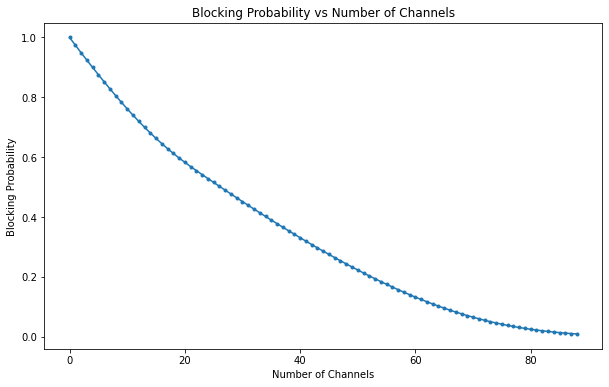

In [25]:
plt.figure(figsize=(10, 6))

plt.plot(range(0, C_iter + 1), 
         blockingProbAcrossChannels, 
         marker='o',
         linestyle='-',
         markersize=3) 
plt.xlabel("Number of Channels")
plt.ylabel("Blocking Probability")
plt.title("Blocking Probability vs Number of Channels")

plt.show()